In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def accel_LJ(mass, position):
    N = mass.shape[0]
    accel_LJ = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_pow2 = displacement[0]**2+displacement[1]**2+displacement[2]**2
            distance_pow6 = distance_pow2**3
            displacement = 12.0*displacement/distance_pow2/distance_pow6*(1.0-1.0/distance_pow6)
            accel_LJ[i,:] += displacement/mass[i]
            accel_LJ[j,:] -= displacement/mass[j]
    return accel_LJ

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

In [3]:
# argon atoms
m_particle = 6.69e-26 # kg
V_LJ = 1.65e-21 # Joules
r_m = 0.42e-9 # meters
time_unit = np.sqrt(m_particle/V_LJ)*r_m

In [4]:
# System of 4 equal masses on corners of square with no initial velocity (cold start)
N=4
mass=np.array([1.00,1.00,1.00,1.00])
position=np.zeros([N,3])
position[0,:]=np.array([+1.0,+1.0,0.0])
position[1,:]=np.array([-1.0,+1.0,0.0])
position[2,:]=np.array([-1.0,-1.0,0.0])
position[3,:]=np.array([+1.0,-1.0,0.0])
velocity=np.zeros([N,3])

In [5]:
# Step size and number of time steps
dt=0.02
tot_time=20.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position

In [6]:
# First time step
acceleration=accel_LJ(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position

In [7]:
# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=accel_LJ(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position

<IPython.core.display.Javascript object>


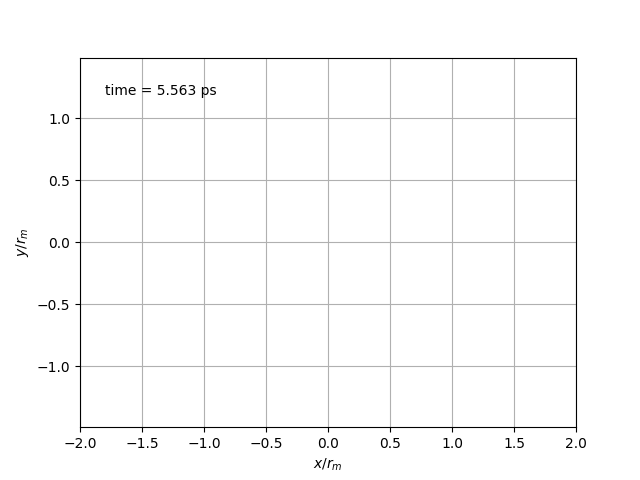

In [21]:
t = np.linspace(0.0, tot_time, num_steps+1)*time_unit*1e12 #convert to picoseconds

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.0,+2.0), ylim=(-2.0,+2.0))
ax.grid()
plt.axis('equal'); #comment this out?
plt.xlabel('$x/r_m$');
plt.ylabel('$y/r_m$');

line, = ax.plot([], [], 'or', lw=2)
time_template = 'time = %.3f ps'
time_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [positions[:,0,i]]
    thisy = [positions[:,1,i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)

plt.show()

<IPython.core.display.Javascript object>


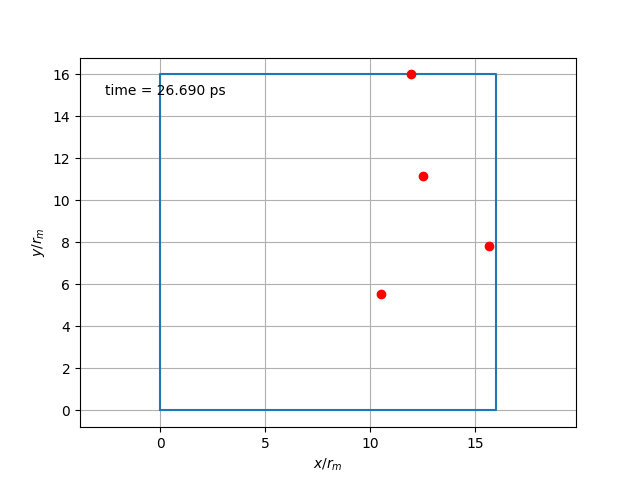

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def accel_LJ(mass, position):
    N = mass.shape[0]
    accel_LJ = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_pow2 = displacement[0]**2+displacement[1]**2+displacement[2]**2
            distance_pow6 = distance_pow2**3
            displacement = 12.0*displacement/distance_pow2/distance_pow6*(1.0-1.0/distance_pow6)
            accel_LJ[i,:] += displacement/mass[i]
            accel_LJ[j,:] -= displacement/mass[j]
    return accel_LJ

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

    
    

def fp(pos,dt,m):
    
    k = m*((2*np.pi)/(16*dt))**2
    xmin = 0.0
    xmax = 16.0
    ymin = 0.0
    ymax = 16.0
    
    fx = 0.
    fy = 0.
    
    
    #if I enter in i = 0
    #position[0,:]
    
    #that position has postion[0,:] = [a,b,c]
    #then pos[0] = a (xcomponent)
    
    #same with pos[1] = b (ycomponent)
    
    
        
    if (pos[0] > xmax):
        fx = -k*(pos[0] - xmax)
    elif (pos[0] < xmin):
        fx = -k*(pos[0])
    if (pos[1] > ymax):
        fy = -k*(pos[1] - ymax)
    elif (pos[1] < ymin):
        fy = -k*(pos[1])
        
    return np.array([fx,fy,0])

def springAccel(mass,position,dt):

    accelSpring = accel_LJ(mass,position)
    
   
    for i in range(len(mass)):
        accelSpring[i,:] += fp(position[i,:],dt,mass[i])/mass[i]
        
        
    return accelSpring
    


# argon atoms
m_particle = 6.69e-26 # kg
V_LJ = 1.65e-21 # Joules
r_m = 0.42e-9 # meters
time_unit = np.sqrt(m_particle/V_LJ)*r_m


# System of 4 equal masses on corners of square with no initial velocity (cold start)

N=4

    
mass=np.array([1.00,1.00,1.00,1.00])
position=np.zeros([N,3])
position[0,:]=np.array([+5.0,+6.0,0.0])
position[1,:]=np.array([+7.0,+6.0,0.0])
position[2,:]=np.array([5.0,7.0,0.0])
position[3,:]=np.array([+7.0,7.0,0.0])

velocity=np.zeros([N,3])
velocity[0,:] = np.array([-2,2,0])
velocity[1,:] = np.array([-2,-2,0])
velocity[2,:] = np.array([1,1,0])
velocity[3,:] = np.array([1,2,0])



# Step size and number of time steps
dt=0.02
tot_time=20.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position


# First time step
acceleration=accel_LJ(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position



# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    #acceleration=accel_LJ(mass,position)
    acceleration = springAccel(mass,position,dt)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position
    
    
    
t = np.linspace(0.0, tot_time, num_steps+1)*time_unit*1e12 #convert to picoseconds

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-16.0,+16.0), ylim=(-16.0,+16.0))
ax.grid()
plt.axis('equal'); #comment this out?
plt.xlabel('$x/r_m$');
plt.ylabel('$y/r_m$');

plt.plot((0,0,16,16,0),(0,16,16,0,0))

line, = ax.plot([], [], 'or', lw=2)
time_template = 'time = %.3f ps'
time_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [positions[:,0,i]]
    thisy = [positions[:,1,i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)

plt.show()

In [9]:
#from IPython.display import HTML
#HTML(anim.to_html5_video())
position.shape


(4, 3)

In [57]:
N=4
position = np.zeros([N,3])
print(position)
print(position[0])
for i in range(N):
    position[i,:] = np.random.randint(0,16,3)
    position[:,2] = 0
    
print(position)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[0. 0. 0.]
[[15. 11.  0.]
 [ 1.  5.  0.]
 [ 3.  1.  0.]
 [ 9.  6.  0.]]


In [ ]:
singlemass = (mass[0],position)

springAccel

In [54]:
springAccel(mass[[0]],np.array([[-1,-1,0]]),dt)

array([[385.53142192, 385.53142192,   0.        ]])

[-1.         -0.93548387 -0.87096774 -0.80645161 -0.74193548 -0.67741935
 -0.61290323 -0.5483871  -0.48387097 -0.41935484 -0.35483871 -0.29032258
 -0.22580645 -0.16129032 -0.09677419 -0.03225806  0.03225806  0.09677419
  0.16129032  0.22580645  0.29032258  0.35483871  0.41935484  0.48387097
  0.5483871   0.61290323  0.67741935  0.74193548  0.80645161  0.87096774
  0.93548387  1.        ]


<IPython.core.display.Javascript object>


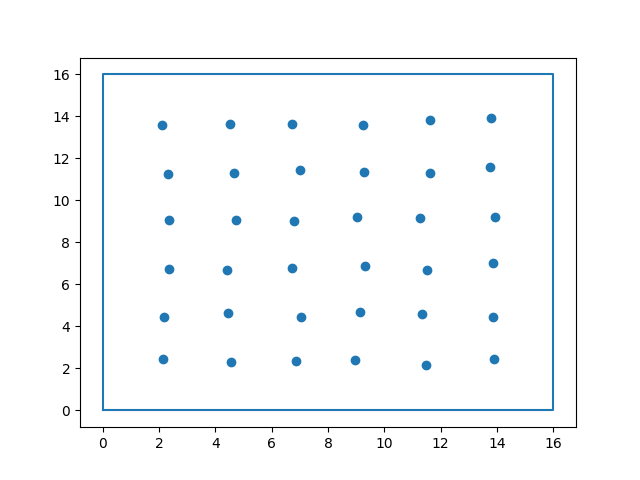

In [128]:
rows,cols = 6,6
numParticles = 32
xgrid = np.linspace(0,16,rows+2)[1:-1]
ygrid = np.linspace(0,16,cols+2)[1:-1]

grid = np.empty([rows*cols,3])
vel = np.empty([N,3])
mass = np.tile(1.0,numParticles)
vel = np.linspace(-1,1,32)
print(vel)

i = 0

for y in xgrid:
    for x in ygrid:
        grid[i,:] = np.array([x,y,0])
        
        i = i+1
        

grid = grid + np.random.uniform(-.2,.2,grid.shape)        
plt.plot((0,0,16,16,0),(0,16,16,0,0))
plt.scatter(grid[:,0],grid[:,1])
plt.show()



(32, 3, 1001)
(32, 1001)


<IPython.core.display.Javascript object>


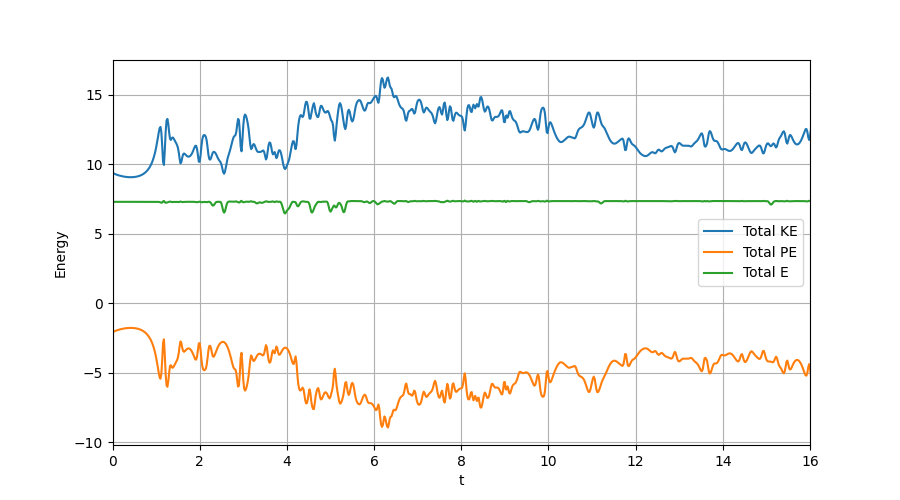

<IPython.core.display.Javascript object>


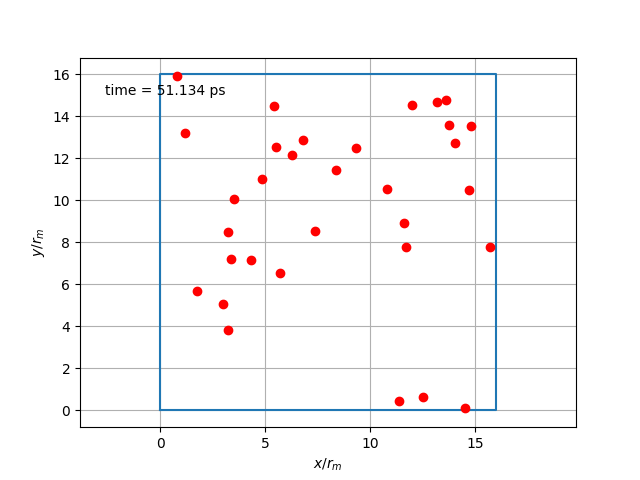

In [63]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def accel_LJ(mass, position):
    N = mass.shape[0]
    accel_LJ = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_pow2 = displacement[0]**2+displacement[1]**2+displacement[2]**2
            distance_pow6 = distance_pow2**3
            displacement = 12.0*displacement/distance_pow2/distance_pow6*(1.0-1.0/distance_pow6)
            accel_LJ[i,:] += displacement/mass[i]
            accel_LJ[j,:] -= displacement/mass[j]
    return accel_LJ

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

    
    

def fp(pos,dt,m):
    
    k = m*((2*np.pi)/(16*dt))**2
    xmin = 0.0
    xmax = 16.0
    ymin = 0.0
    ymax = 16.0
    
    fx = 0.
    fy = 0.
    
    
    #if I enter in i = 0
    #position[0,:]
    
    #that position has postion[0,:] = [a,b,c]
    #then pos[0] = a (xcomponent)
    
    #same with pos[1] = b (ycomponent)
    
    
        
    if (pos[0] > xmax):
        fx = -k*(pos[0] - xmax)
    elif (pos[0] < xmin):
        fx = -k*(pos[0])
    if (pos[1] > ymax):
        fy = -k*(pos[1] - ymax)
    elif (pos[1] < ymin):
        fy = -k*(pos[1])
        
    return np.array([fx,fy,0])

def springAccel(mass,position,dt):

    accelSpring = accel_LJ(mass,position)
    
   
    for i in range(len(mass)):
        accelSpring[i,:] += fp(position[i,:],dt,mass[i])/mass[i]
        
        
    return accelSpring
    


# argon atoms
m_particle = 6.69e-26 # kg
V_LJ = 1.65e-21 # Joules
r_m = 0.42e-9 # meters
time_unit = np.sqrt(m_particle/V_LJ)*r_m


# System of 4 equal masses on corners of square with no initial velocity (cold start)

N=32 #number of atoms

   
#mass=np.array([1.00,1.00,1.00,1.00])
mass = np.tile(1.0,N)
position=np.zeros([N,3])
rows,cols = 4,8

xgrid = np.linspace(0,16,rows+2)[1:-1]
ygrid = np.linspace(0,16,cols+2)[1:-1]
zgrid = np.tile(0.0,N)
grid = np.empty([rows*cols,3])

i = 0

for x in xgrid:
    for y in ygrid:
        grid[i,:] = np.array([x,y,0])
        i = i+1
        

grid = grid + np.random.uniform(-.2,.2,grid.shape) 
#orderArray = np.arange(grid.shape[0])
#np.random.shuffle(orderArray)
#plt.scatter(grid[:,0],grid[:,1])
position = np.array( [ grid[:,0],grid[:,1],grid[:,2] ] ).T



#velocity=np.zeros([N,3])
velocity = np.zeros( [mass.shape[0],3] )


velx = np.linspace(-1,1,rows+2)[1:-1]
vely = np.linspace(-1,1,cols+2)[1:-1]
gridvel = np.empty([rows*cols,3])

v = 0

for xvel in velx:
    for yvel in vely:
        gridvel[v,:] = np.array([xvel,yvel,0])
        v = v+1
        
gridvel = gridvel + np.random.uniform(-.3,.3,grid.shape)

velocity = np.array( [ gridvel[:,0],gridvel[:,1],gridvel[:,2] ] ).T



#velocity[0,:] = np.array([-2,2,0])
#velocity[1,:] = np.array([-2,-2,0])
#velocity[2,:] = np.array([1,1,0])
#velocity[3,:] = np.array([1,2,0])



# Step size and number of time steps
dt=0.02
tot_time=20.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position



# First time step
acceleration=accel_LJ(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position



# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    #acceleration=accel_LJ(mass,position)
    acceleration = springAccel(mass,position,dt)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position
    


def pos2Vel(positions,dt):
    velocities = np.empty(positions.shape)

    
    for m in range(positions.shape[0]):
        for t in range(1,positions.shape[2]-1):
            velocities[m,:,t] = (positions[m,:,t+1]-positions[m,:,t-1])/(2*dt)
        
        velocities[m,:,0] = (1/dt)*( (-3/2)*positions[m,:,0] + 2.0*positions[m,:,1] - 0.5*positions[m,:,2] )
        velocities[m,:,-1] = (1/dt)*( (3/2)*positions[m,:,-1] - 2.0*positions[m,:,-2] +0.5*positions[m,:,-3] )
                                    
    return velocities
        

    
tspan = np.linspace(0.0,tot_time,num_steps)
                                    
getvelo = pos2Vel(positions[:,:,:],dt)
print(getvelo.shape)



def KE(velo,mass):
    
    T = np.empty([velo.shape[0],velo.shape[2] ])
    
    for m in range(mass.shape[0]):
        for t in range(0,velo.shape[2]):
            normvelo = velo[m,0,t]**2 + velo[m,1,t]**2 + velo[m,2,t]**2
             
            T[m,t] =0.5*mass[m]*(normvelo)
            

    return T

def totalKE(velo,mass):
    
    T = KE(velo,mass)
    print(T.shape)
    return T.sum(0)


def PE(N,position,mass):
    
    LJpot = np.empty(position.shape[2])
    for t in range(position.shape[2]):
        hold = 0.0
        for i in range(N-1):
            for j in range(i+1,N):
                diffvector = position[j,:,t] - position[i,:,t]
                
               # normdvector = (position[j,:,t] - position[i,:,t])
            
                #normdvector = (diffvector[0]**2 + diffvector[1]**2 + diffvector[2]**2)
                
                normdvector = np.linalg.norm(diffvector)
                hold = hold + (1/normdvector)**12 - 2*(1/normdvector)**6
                
        LJpot[t] = hold
            
    return LJpot




     
    
totalT = totalKE(getvelo,mass)
totalPE = PE(N,positions,mass)
totalE = totalT + totalPE
t = np.linspace(0.0, tot_time, num_steps+1)*time_unit*1e12 #convert to picoseconds
tspan = np.linspace(0,tot_time,len(totalT))
fig2 = plt.figure(figsize=(9,5))
plt.plot(tspan,totalT,label='Total KE')
plt.plot(tspan,totalPE,label='Total PE')
plt.plot(tspan,totalE,label='Total E')
plt.grid()
plt.xlabel('t')
plt.ylabel('Energy')
plt.legend()
plt.xlim(0,16)
fig2.savefig('energyvsTimeMolecularDyanmicswithinitialV.pdf',bbox_inches='tight')

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-16.0,+16.0), ylim=(-16.0,+16.0))
ax.grid()
plt.axis('equal'); #comment this out?
plt.xlabel('$x/r_m$');
plt.ylabel('$y/r_m$');

plt.plot((0,0,16,16,0),(0,16,16,0,0)) #box shape

line, = ax.plot([], [], 'or', lw=2)
time_template = 'time = %.3f ps'
time_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [positions[:,0,i]]
    thisy = [positions[:,1,i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)



plt.show()

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def accel_LJ(mass, position):
    N = mass.shape[0]
    accel_LJ = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_pow2 = displacement[0]**2+displacement[1]**2+displacement[2]**2
            distance_pow6 = distance_pow2**3
            displacement = 12.0*displacement/distance_pow2/distance_pow6*(1.0-1.0/distance_pow6)
            accel_LJ[i,:] += displacement/mass[i]
            accel_LJ[j,:] -= displacement/mass[j]
    return accel_LJ

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

    
    

def fp(pos,dt,m):
    
    k = m*((2*np.pi)/(16*dt))**2
    xmin = 0.0
    xmax = 16.0
    ymin = 0.0
    ymax = 16.0
    
    fx = 0.
    fy = 0.
    
    
    #if I enter in i = 0
    #position[0,:]
    
    #that position has postion[0,:] = [a,b,c]
    #then pos[0] = a (xcomponent)
    
    #same with pos[1] = b (ycomponent)
    
    
        
    if (pos[0] > xmax):
        fx = -k*(pos[0] - xmax)
    elif (pos[0] < xmin):
        fx = -k*(pos[0])
    if (pos[1] > ymax):
        fy = -k*(pos[1] - ymax)
    elif (pos[1] < ymin):
        fy = -k*(pos[1])
        
    return np.array([fx,fy,0])

def springAccel(mass,position,dt):

    accelSpring = accel_LJ(mass,position)
    
   
    for i in range(len(mass)):
        accelSpring[i,:] += fp(position[i,:],dt,mass[i])/mass[i]
        
        
    return accelSpring
    


# argon atoms
m_particle = 6.69e-26 # kg
V_LJ = 1.65e-21 # Joules
r_m = 0.42e-9 # meters
time_unit = np.sqrt(m_particle/V_LJ)*r_m


# System of 4 equal masses on corners of square with no initial velocity (cold start)

N=32 #number of atoms

   
#mass=np.array([1.00,1.00,1.00,1.00])
mass = np.tile(1.0,N)
position=np.zeros([N,3])
rows,cols = 4,8

xgrid = np.linspace(0,16,rows+2)[1:-1]
ygrid = np.linspace(0,16,cols+2)[1:-1]
zgrid = np.tile(0.0,N)
grid = np.empty([rows*cols,3])

i = 0

for x in xgrid:
    for y in ygrid:
        grid[i,:] = np.array([x,y,0])
        i = i+1
        

grid = grid + np.random.uniform(-.2,.2,grid.shape) 
#orderArray = np.arange(grid.shape[0])
#np.random.shuffle(orderArray)
#plt.scatter(grid[:,0],grid[:,1])
position = np.array( [ grid[:,0],grid[:,1],grid[:,2] ] ).T



velocity=np.zeros([N,3])
'''
velocity = np.zeros( [mass.shape[0],3] )


velx = np.linspace(-1,1,rows+2)[1:-1]
vely = np.linspace(-1,1,cols+2)[1:-1]
gridvel = np.empty([rows*cols,3])

v = 0

for xvel in velx:
    for yvel in vely:
        gridvel[v,:] = np.array([xvel,yvel,0])
        v = v+1
        
gridvel = gridvel + np.random.uniform(-.3,.3,grid.shape)

velocity = np.array( [ gridvel[:,0],gridvel[:,1],gridvel[:,2] ] ).T

'''

#velocity[0,:] = np.array([-2,2,0])
#velocity[1,:] = np.array([-2,-2,0])
#velocity[2,:] = np.array([1,1,0])
#velocity[3,:] = np.array([1,2,0])



# Step size and number of time steps
dt=0.02
tot_time=20.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position



# First time step
acceleration=accel_LJ(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position



# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    #acceleration=accel_LJ(mass,position)
    acceleration = springAccel(mass,position,dt)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position
    


def pos2Vel(positions,dt):
    velocities = np.empty(positions.shape)

    
    for m in range(positions.shape[0]):
        for t in range(1,positions.shape[2]-1):
            velocities[m,:,t] = (positions[m,:,t+1]-positions[m,:,t-1])/(2*dt)
        
        velocities[m,:,0] = (1/dt)*( (-3/2)*positions[m,:,0] + 2.0*positions[m,:,1] - 0.5*positions[m,:,2] )
        velocities[m,:,-1] = (1/dt)*( (3/2)*positions[m,:,-1] - 2.0*positions[m,:,-2] +0.5*positions[m,:,-3] )
                                    
    return velocities
        

    
tspan = np.linspace(0.0,tot_time,num_steps)
                                    
getvelo = pos2Vel(positions[:,:,:],dt)
print(getvelo.shape)



def KE(velo,mass):
    
    T = np.empty([velo.shape[0],velo.shape[2] ])
    
    for m in range(mass.shape[0]):
        for t in range(0,velo.shape[2]):
            normvelo = velo[m,0,t]**2 + velo[m,1,t]**2 + velo[m,2,t]**2
             
            T[m,t] =0.5*mass[m]*(normvelo)
            

    return T

def totalKE(velo,mass):
    
    T = KE(velo,mass)
    print(T.shape)
    return T.sum(0)


def PE(N,position,mass):
    
    LJpot = np.empty(position.shape[2])
    for t in range(position.shape[2]):
        hold = 0.0
        for i in range(N-1):
            for j in range(i+1,N):
                diffvector = position[j,:,t] - position[i,:,t]
                
               # normdvector = (position[j,:,t] - position[i,:,t])
            
                #normdvector = (diffvector[0]**2 + diffvector[1]**2 + diffvector[2]**2)
                
                normdvector = np.linalg.norm(diffvector)
                hold = hold + (1/normdvector)**12 - 2*(1/normdvector)**6
                
        LJpot[t] = hold
            
    return LJpot




     
    
totalT = totalKE(getvelo,mass)
totalPE = PE(N,positions,mass)
totalE = totalT + totalPE
t = np.linspace(0.0, tot_time, num_steps+1)*time_unit*1e12 #convert to picoseconds
tspan = np.linspace(0,tot_time,len(totalT))
fig2 = plt.figure(figsize=(9,5))
plt.plot(tspan,totalT,label='Total KE')
plt.plot(tspan,totalPE,label='Total PE')
plt.plot(tspan,totalE,label='Total E')
plt.grid()
plt.xlabel('t')
plt.ylabel('Energy')
plt.legend()
plt.xlim(0,16)
fig2.savefig('energyvsTimeMolecularDyanmics.pdf',bbox_inches='tight')

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-16.0,+16.0), ylim=(-16.0,+16.0))
ax.grid()
plt.axis('equal'); #comment this out?
plt.xlabel('$x/r_m$');
plt.ylabel('$y/r_m$');

plt.plot((0,0,16,16,0),(0,16,16,0,0)) #box shape

line, = ax.plot([], [], 'or', lw=2)
time_template = 'time = %.3f ps'
time_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [positions[:,0,i]]
    thisy = [positions[:,1,i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)

ani.save('MD_NoIntialVelocities.gif',writer='imagemagick',fps=30)

plt.show()

(32, 3, 1001)
(32, 1001)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.


In [15]:
''''
def pos2Vel2(xpos,ypos,dt):
    
    l = len(xpos)
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )
    
    

    return np.array([velx,vely])
''''

"""
positions[:,:,:] -> velocities[:,:,:]
iterate through each mass, then compute each velocity for time step t

velocities = np.zeros(positions.shape[0])
for m in range(positions.shape[0]):
    for t in range(1,positions.shape[2]-1):
        ## compute velocities correspond to mass m and time t
        velocities[m,:,t]=
        
        ## velocities[m,:,t] = (positions[m,:,t+1]-positions[m,:,t-1])/(2*dt)
        
    ## velocities[m,:,0] = (1/dt)*( (-3/2)*positions[m,:,0] + 2.0*positions[m,:,1] - 0.5*positions[m,:,2] )
    ## velocities[m,:,velcoities.shape[2]-1] - same as below
    ## velocities[m,:,-1] = (1/dt)*( (3/2)*positions[m,:,-1] - 2.0*positions[m,:,-2] +0.5*positions[m,:,-3] )
""

(2, 1001)


In [26]:
fig,axes = plt.subplots(2,3,figsize=(12,7) )#,sharex = True,sharey = True)

    axes[0,0].plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
    axes[0,0].set_title(r'$\alpha$ = 0'  ) 

    
    axes[0,1].plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
    axes[0,1].set_title(r'$\alpha$ = 7.5e-7'  )
    
    axes[0,2].plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
    axes[0,2].set_title(r'$\alpha$ = 7.5e-6'  )

    axes[1,0].plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
    axes[1,0].set_title(r'$\alpha$ = 7.5e-5'  )
    
    
    axes[1,1].plot(positions[1,0,:],positions[1,1,:],'b-',positions5[0,0,:],positions[0,1,:],'r-')
    axes[1,1].set_title(r'$\alpha$ = 7.5e-4'  )
    
    
    axes[1,2].plot(posfor6[1,0,:],posfor6[1,1,:],'b-',posfor6[0,0,:],posfor6[0,1,:],'r-')
    axes[1,2].set_title(r'$\alpha$ = 7.5e-3'  )
    
    fig.tight_layout()
    
    for ax in axes.flat:
        #ax.set(xlabel='t (weeks)', ylabel='population')
        ax.grid(True)
        
    plt.setp(axes[-1, :], xlabel='x (AU)')
    plt.setp(axes[:, 0], ylabel='y (AU)')

53.487262714848974


In [31]:

plt.show()
print(totalT.shape)
print(tspan.shape)

(1001,)
(1001,)


In [40]:
vec1 = np.array([1,2,3,4])
vec2 = np.array([2,3,4,5])
diffvec = vec1 - vec2

print(np.linalg.norm(diffvec))

2.0


(32, 3, 1001)
(32, 1001)


<IPython.core.display.Javascript object>


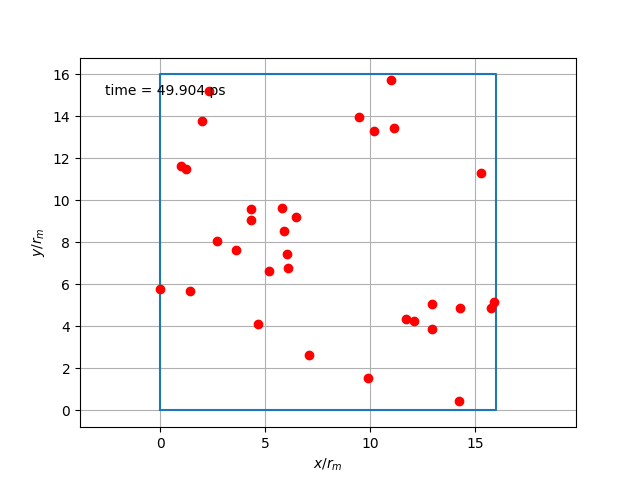

MovieWriter imagemagick unavailable; using Pillow instead.


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def accel_LJ(mass, position):
    N = mass.shape[0]
    accel_LJ = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_pow2 = displacement[0]**2+displacement[1]**2+displacement[2]**2
            distance_pow6 = distance_pow2**3
            displacement = 12.0*displacement/distance_pow2/distance_pow6*(1.0-1.0/distance_pow6)
            accel_LJ[i,:] += displacement/mass[i]
            accel_LJ[j,:] -= displacement/mass[j]
    return accel_LJ

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

    
    

def fp(pos,dt,m):
    
    k = m*((2*np.pi)/(16*dt))**2
    xmin = 0.0
    xmax = 16.0
    ymin = 0.0
    ymax = 16.0
    
    fx = 0.
    fy = 0.
    
    
    #if I enter in i = 0
    #position[0,:]
    
    #that position has postion[0,:] = [a,b,c]
    #then pos[0] = a (xcomponent)
    
    #same with pos[1] = b (ycomponent)
    
    
        
    if (pos[0] > xmax):
        fx = -k*(pos[0] - xmax)
    elif (pos[0] < xmin):
        fx = -k*(pos[0])
    if (pos[1] > ymax):
        fy = -k*(pos[1] - ymax)
    elif (pos[1] < ymin):
        fy = -k*(pos[1])
        
    return np.array([fx,fy,0])

def springAccel(mass,position,dt):

    accelSpring = accel_LJ(mass,position)
    
   
    for i in range(len(mass)):
        accelSpring[i,:] += fp(position[i,:],dt,mass[i])/mass[i]
        
        
    return accelSpring
    


# argon atoms
m_particle = 6.69e-26 # kg
V_LJ = 1.65e-21 # Joules
r_m = 0.42e-9 # meters
time_unit = np.sqrt(m_particle/V_LJ)*r_m


# System of 4 equal masses on corners of square with no initial velocity (cold start)

N=32 #number of atoms

   
#mass=np.array([1.00,1.00,1.00,1.00])
mass = np.tile(1.0,N)
position=np.zeros([N,3])
rows,cols = 4,8

xgrid = np.linspace(0,16,rows+2)[1:-1]
ygrid = np.linspace(0,16,cols+2)[1:-1]
zgrid = np.tile(0.0,N)
grid = np.empty([rows*cols,3])

i = 0

for x in xgrid:
    for y in ygrid:
        grid[i,:] = np.array([x,y,0])
        i = i+1
        

grid = grid + np.random.uniform(-.2,.2,grid.shape) 
#orderArray = np.arange(grid.shape[0])
#np.random.shuffle(orderArray)
#plt.scatter(grid[:,0],grid[:,1])
position = np.array( [ grid[:,0],grid[:,1],grid[:,2] ] ).T



#velocity=np.zeros([N,3])
velocity = np.zeros( [mass.shape[0],3] )


velx = np.linspace(-1,1,rows+2)[1:-1]
vely = np.linspace(-1,1,cols+2)[1:-1]
gridvel = np.empty([rows*cols,3])

v = 0

for xvel in velx:
    for yvel in vely:
        gridvel[v,:] = np.array([xvel,yvel,0])
        v = v+1
        
gridvel = gridvel + np.random.uniform(-.3,.3,grid.shape)

velocity = np.array( [ gridvel[:,0],gridvel[:,1],gridvel[:,2] ] ).T



#velocity[0,:] = np.array([-2,2,0])
#velocity[1,:] = np.array([-2,-2,0])
#velocity[2,:] = np.array([1,1,0])
#velocity[3,:] = np.array([1,2,0])



# Step size and number of time steps
dt=0.02
tot_time=20.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position



# First time step
acceleration=accel_LJ(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position



# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    #acceleration=accel_LJ(mass,position)
    acceleration = springAccel(mass,position,dt)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position
    


def pos2Vel(positions,dt):
    velocities = np.empty(positions.shape)

    
    for m in range(positions.shape[0]):
        for t in range(1,positions.shape[2]-1):
            velocities[m,:,t] = (positions[m,:,t+1]-positions[m,:,t-1])/(2*dt)
        
        velocities[m,:,0] = (1/dt)*( (-3/2)*positions[m,:,0] + 2.0*positions[m,:,1] - 0.5*positions[m,:,2] )
        velocities[m,:,-1] = (1/dt)*( (3/2)*positions[m,:,-1] - 2.0*positions[m,:,-2] +0.5*positions[m,:,-3] )
                                    
    return velocities
        

    
tspan = np.linspace(0.0,tot_time,num_steps)
                                    
getvelo = pos2Vel(positions[:,:,:],dt)
print(getvelo.shape)



def KE(velo,mass):
    
    T = np.empty([velo.shape[0],velo.shape[2] ])
    
    for m in range(mass.shape[0]):
        for t in range(0,velo.shape[2]):
            normvelo = velo[m,0,t]**2 + velo[m,1,t]**2 + velo[m,2,t]**2
             
            T[m,t] =0.5*mass[m]*(normvelo)
            

    return T

def totalKE(velo,mass):
    
    T = KE(velo,mass)
    print(T.shape)
    return T.sum(0)


def PE(N,position,mass):
    
    LJpot = np.empty(position.shape[2])
    for t in range(position.shape[2]):
        hold = 0.0
        for i in range(N-1):
            for j in range(i+1,N):
                diffvector = position[j,:,t] - position[i,:,t]
                
               # normdvector = (position[j,:,t] - position[i,:,t])
            
                #normdvector = (diffvector[0]**2 + diffvector[1]**2 + diffvector[2]**2)
                
                normdvector = np.linalg.norm(diffvector)
                hold = hold + (1/normdvector)**12 - 2*(1/normdvector)**6
                
        LJpot[t] = hold
            
    return LJpot




     
    
totalT = totalKE(getvelo,mass)
totalPE = PE(N,positions,mass)
totalE = totalT + totalPE
t = np.linspace(0.0, tot_time, num_steps+1)*time_unit*1e12 #convert to picoseconds
tspan = np.linspace(0,tot_time,len(totalT))

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-16.0,+16.0), ylim=(-16.0,+16.0))
ax.grid()
plt.axis('equal'); #comment this out?
plt.xlabel('$x/r_m$');
plt.ylabel('$y/r_m$');

plt.plot((0,0,16,16,0),(0,16,16,0,0)) #box shape


line, = ax.plot([], [], 'or', lw=2)
time_template = 'time = %.3f ps'
time_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [positions[:,0,i]]
    thisy = [positions[:,1,i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)
ani.save('MD_withIntialVelocities.gif',writer='imagemagick',fps=30)

plt.show()

<IPython.core.display.Javascript object>


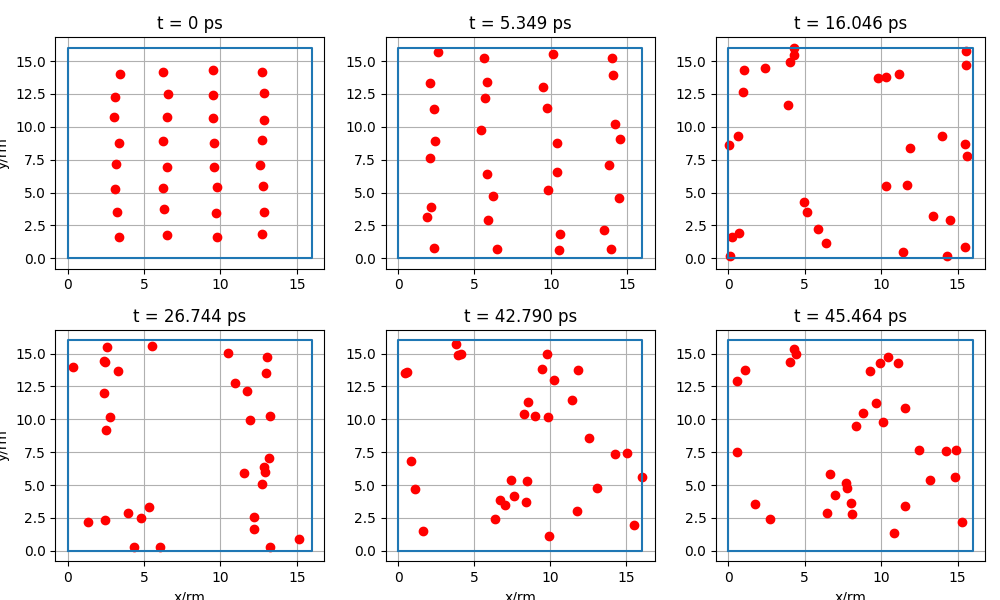

In [61]:
fig2,axes = plt.subplots(2,3,figsize=(10,6) )#,sharex = True,sharey = True)


axes[0,0].plot(positions[:,0,0],positions[:,1,0],'or')
axes[0,0].set_title('t = 0 ps')
    
axes[0,1].plot(positions[:,0,100],positions[:,1,100],'or')
axes[0,1].set_title('t = ' + "{:.3f}".format(t[100])+' ps')
    
axes[0,2].plot(positions[:,0,300],positions[:,1,300],'or')
axes[0,2].set_title('t = '  + "{:.3f}".format(t[300])+' ps')

axes[1,0].plot(positions[:,0,500],positions[:,1,500],'or')
axes[1,0].set_title('t = ' + "{:.3f}".format(t[500])+' ps')
    
    
axes[1,1].plot(positions[:,0,800],positions[:,1,800],'or')
axes[1,1].set_title('t = '+ "{:.3f}".format(t[800])+' ps')
    
    
axes[1,2].plot(positions[:,0,850],positions[:,1,850],'or')
axes[1,2].set_title('t = '+ "{:.3f}".format(t[850])+' ps')
fig2.tight_layout()
    
for ax in axes.flat:
        #ax.set(xlabel='t (weeks)', ylabel='population')
    ax.grid(True)
    ax.plot((0,0,16,16,0),(0,16,16,0,0))
        
plt.setp(axes[-1, :], xlabel='x/rm')
plt.setp(axes[:, 0], ylabel='y/rm')       
plt.show()

fig2.savefig('MDsimulations.pdf',bbox_inches='tight')


In [39]:
print(len(positions))

32


In [ ]:
import numpy as np
import matplotlib 